# Lista 02
### Métodos Numéricos 2 
## Ejercicio 1
Implemente un algoritmo o funci´on que, dada una matriz A, calcule las siguientes descomposiciones (una funci´on diferente
para cada una):
#### 1.1 PA=LU

In [35]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve, qr

In [36]:
def descomposicion_PA_LU(A):
    A = A.astype(float)
    n = len(A)
    L = np.identity(n)
    U = A.copy()
    P = np.identity(n)

    for k in range(n - 1):
        # Encontrar el índice del elemento máximo en la columna k (pivoteo parcial)
        max_index = np.argmax(np.abs(U[k:, k])) + k

        # Intercambiar filas en la matriz de permutación P
        P[[k, max_index]] = P[[max_index, k]]

        # Intercambiar filas en la matriz U
        U[[k, max_index]] = U[[max_index, k]]

        # Realizar eliminación gaussiana en U y actualizar L
        for i in range(k + 1, n):
            factor = U[i, k] / U[k, k]
            L[i, k] = factor
            U[i, k:] -= factor * U[k, k:]

    return P, L, U

### 1.2 Cholesky

In [37]:
def es_positivo_definida(A):
    valores_propios = np.linalg.eigvals(A)
    return all(valores_propios > 0)

In [38]:
def descomposicion_cholesky(A):
    if not np.allclose(A, A.T):
        raise ValueError("La matriz no es simétrica")
    if not es_positivo_definida(A):
        raise ValueError("Matriz A no es positivo definida.")
    n = len(A)
    L = np.zeros_like(A, dtype=float)

    for i in range(n):
        for j in range(i + 1):
            suma = sum(L[i, k] * L[j, k] for k in range(j))
            if i == j:
                L[i, j] = np.sqrt(A[i, i] - suma)
            else:
                L[i, j] = (A[i, j] - suma) / L[j, j]
    return L

### 1.3 QR

In [39]:
def descomposicion_qr(A):
    A = A.astype(float)
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j].copy()
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

In [40]:
A = np.array([[1/1, 1/2, 1/3],[1/2, 1/3, 1/4], [1/3, 1/4, 1/5]])
B = np.array([[1, 1, 0, 3],[2, 1, -1, 1], [3, -1, -1, 2], [-1, 2, 3, -1]])
C = np.array([[2, -1, 0, 0],[-1, 2, -1, 0], [0, -1, 2, -1], [0, 0, -1, 0]])
A, B, C

(array([[1.        , 0.5       , 0.33333333],
        [0.5       , 0.33333333, 0.25      ],
        [0.33333333, 0.25      , 0.2       ]]),
 array([[ 1,  1,  0,  3],
        [ 2,  1, -1,  1],
        [ 3, -1, -1,  2],
        [-1,  2,  3, -1]]),
 array([[ 2, -1,  0,  0],
        [-1,  2, -1,  0],
        [ 0, -1,  2, -1],
        [ 0,  0, -1,  0]]))

In [41]:
descomposicion_PA_LU(A), descomposicion_PA_LU(B), descomposicion_PA_LU(C)

((array([[1., 0., 0.],
         [0., 0., 1.],
         [0., 1., 0.]]),
  array([[1.        , 0.        , 0.        ],
         [0.5       , 1.        , 0.        ],
         [0.33333333, 1.        , 1.        ]]),
  array([[ 1.        ,  0.5       ,  0.33333333],
         [ 0.        ,  0.08333333,  0.08888889],
         [ 0.        ,  0.        , -0.00555556]])),
 (array([[0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [0., 1., 0., 0.],
         [1., 0., 0., 0.]]),
  array([[ 1.        ,  0.        ,  0.        ,  0.        ],
         [ 0.66666667,  1.        ,  0.        ,  0.        ],
         [ 0.33333333,  0.8       ,  1.        ,  0.        ],
         [-0.33333333,  1.        ,  0.6       ,  1.        ]]),
  array([[ 3.00000000e+00, -1.00000000e+00, -1.00000000e+00,
           2.00000000e+00],
         [ 0.00000000e+00,  1.66666667e+00,  2.66666667e+00,
          -3.33333333e-01],
         [ 0.00000000e+00,  0.00000000e+00, -3.00000000e+00,
           5.55111512e-17],
  

In [42]:
descomposicion_cholesky(A)

array([[1.        , 0.        , 0.        ],
       [0.5       , 0.28867513, 0.        ],
       [0.33333333, 0.28867513, 0.0745356 ]])

### B y C no son positivamente definidas por lo que no admiten Cholesky

In [43]:
descomposicion_qr(A), descomposicion_qr(B), descomposicion_qr(C)

((array([[ 0.85714286, -0.50160492,  0.11704115],
         [ 0.42857143,  0.56848557, -0.70224688],
         [ 0.28571429,  0.65208639,  0.70224688]]),
  array([[1.16666667, 0.64285714, 0.45      ],
         [0.        , 0.10171433, 0.10533703],
         [0.        , 0.        , 0.00390137]])),
 (array([[ 2.58198890e-01,  4.36759746e-01, -1.68191983e-01,
           8.45154255e-01],
         [ 5.16397779e-01,  4.88143246e-01, -4.87756751e-01,
          -5.07092553e-01],
         [ 7.74596669e-01, -2.31225748e-01,  5.88671940e-01,
          -7.57865537e-17],
         [-2.58198890e-01,  7.19368994e-01,  6.22310337e-01,
          -1.69030851e-01]]),
  array([[ 3.87298335, -0.51639778, -2.06559112,  3.09838668],
         [ 0.        ,  2.59486673,  1.90118948,  0.61660199],
         [ 0.        ,  0.        ,  1.76601582, -0.43729916],
         [ 0.        ,  0.        ,  0.        ,  2.19740106]])),
 (array([[ 0.89442719,  0.35856858,  0.19518001, -0.18257419],
         [-0.4472136 ,  0.71

## Ejercicio 2
Implementar algoritmos para los metodos de Jacobi, Seidel, JOR, y SOR para resolver $Ax = b$. En este caso, ademas de la informacion del sistema, cada funcion debe recibir como argumento una $x_{0}$ como punto inicial, una tolerancia maxima $\epsilon \ge 0$ para el criterio de paro, un numero maximo de iteraciones $maxI$ y cuando sea necesario el parametro $\omega$. <br>

In [44]:
### función matriz dominante
def es_dominante(A, tolerancia=1e-6):
    A = np.array(A)
    num_filas, num_cols = A.shape
    for i in range(num_filas):
        diagonal = abs(A[i, i])
        row_suma = np.sum(np.abs(A[i, :])) - diagonal
        if diagonal <= row_suma + tolerancia:
            return False
    return True

### Metodo Jacobi

In [45]:
def jacobi(A, b, x_0, epsilon=1e-8, iter=500):
    #print("A =")
    #print(A)
    #print("b =")
    #print(np.atleast_2d(b).T)
    if es_dominante(A) == True:
        print("calculando...")
    else:
        print('Advertencia: La Matriz no es diagonalmente dominante. \n\
            Existe riesgo de no convergencia')
    n = len(b)
    x_new = np.zeros_like(x_0, dtype=np.float32)
    
    D = np.diag(A).astype(np.float32)
    R = A.astype(np.float32) - np.diagflat(D).astype(np.float32)

    for i in range(iter):
        x_old = x_new
        x_new = (b - np.dot(R,x_old)) / D
        if (np.all(abs(x_old-x_new)) <= epsilon):
            print(f"Converge despues de {i + 1} iteraciones.")
            break
    return x_new

### Metodo Seidel

In [46]:
def seidel(A, b, x_0, epsilon=1e-8, iter=5000):
    #print("A =")
    #print(A)
    #print("b =")
    #print(np.atleast_2d(b).T)
    x = x_0
    for it_count in range(iter):
        x_new = np.zeros_like(x, dtype=np.float_)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if np.allclose(x, x_new, rtol=epsilon):
            print(f"Converge despues de {it_count + 1} iteraciones.")
            break
        x = x_new
    return x

### Metodo JOR

In [47]:
def jor(A, b, x_0, epsilon=1e-8, iter=5000, w=0.5):
    if w < 0 or w > 1:
        raise ValueError("Omega (w) debe estar entre 0 y 1")
    #print("A =")
    #print(A)
    #print("b =")
    #print(np.atleast_2d(b).T)
    n = len(b)
    x = x_0.copy()
    for _ in range(iter):
        x_new = np.zeros_like(x, dtype=np.float32)
        for i in range(n):
            x_new[i] = (1 - w) * x[i] + (w / A[i, i]) * (b[i] - np.dot(A[i, :i], x_new[:i]) - np.dot(A[i, i+1:], x[i+1:]))
        if np.linalg.norm(x_new - x) < epsilon:
            print(f"Converge despues de { _ + 1} iteraciones.")
            break
        x = x_new
    return x

### Metodo SOR

In [48]:
def sor(A, b, x_0, epsilon=1e-8, iter=5000, w=1.25):
    if w < 0 or w > 2:
        raise ValueError("Omega (w) debe estar entre 0 y 2")
    #print("A =")
    #print(A)
    #print("b =")
    #print(np.atleast_2d(b).T)
    n = len(b)
    x = x_0
    for _ in range(iter):
        for i in range(n):
            x[i] = (1 - w) * x[i] + (w / A[i, i]) * (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i+1:], x[i+1:]))
        if np.linalg.norm(A @ x - b) < epsilon:
            print(f"Converge despues de { _ + 1} iteraciones.")
            break
    return x

### Sistema tridiagonal

In [49]:
diagonal_principal = 4 * np.ones(100)
diagonal_adyacente = -1 * np.ones(99)
A = np.diag(diagonal_principal) + np.diag(diagonal_adyacente, k=1) + np.diag(diagonal_adyacente, k=-1)
A.shape, A

((100, 100),
 array([[ 4., -1.,  0., ...,  0.,  0.,  0.],
        [-1.,  4., -1., ...,  0.,  0.,  0.],
        [ 0., -1.,  4., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  4., -1.,  0.],
        [ 0.,  0.,  0., ..., -1.,  4., -1.],
        [ 0.,  0.,  0., ...,  0., -1.,  4.]]))

In [50]:
b = np.concatenate(([3], np.full(98, 2), [3]))
b.shape, b

((100,),
 array([3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]))

In [51]:
x_0 = np.round(np.random.rand(100) * 100,0)
x_0

array([35., 81., 70., 45.,  2., 15., 89., 57., 84., 11., 13., 12.,  3.,
       56., 12.,  2., 60., 18., 99., 82., 91., 43.,  9.,  0., 48., 99.,
       12., 52.,  9., 25., 77., 52., 61., 37., 48., 42.,  6., 52., 99.,
       26., 31., 60., 41.,  9., 85., 50., 13., 63., 65., 24., 57., 68.,
       27., 45., 85., 95., 48., 99., 19., 31., 58., 36., 29., 60., 82.,
       87., 61., 71., 36., 15., 99.,  7., 72., 25., 49., 54., 34., 41.,
       58., 10., 15., 75., 49., 84., 15., 97., 78., 76., 14.,  6., 64.,
       35., 32., 57.,  3., 36.,  5., 94., 57., 32.])

In [52]:
x_sol = x_exact = np.ones(100)
x_sol

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [53]:
jacobi_sol = jacobi(A,b,x_0)
jacobi_sol

calculando...
Converge despues de 52 iteraciones.


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [54]:
seidel_sol = seidel(A,b,x_0)
seidel_sol

Converge despues de 21 iteraciones.


array([1.00000001, 1.00000001, 1.00000001, 1.00000001, 1.00000001,
       1.00000001, 1.00000001, 1.00000001, 1.00000001, 1.00000001,
       1.00000001, 1.00000001, 1.00000001, 1.00000001, 1.00000001,
       1.00000001, 1.00000001, 1.00000001, 1.00000001, 1.00000001,
       1.00000001, 1.00000001, 1.00000001, 1.00000001, 1.00000001,
       1.00000001, 1.00000001, 1.00000001, 1.00000001, 1.00000001,
       1.00000001, 1.00000001, 1.00000001, 1.00000001, 1.00000001,
       1.00000001, 1.00000001, 1.00000001, 1.00000002, 1.00000002,
       1.00000002, 1.00000002, 1.00000002, 1.00000002, 1.00000002,
       1.00000001, 1.00000001, 1.00000001, 1.00000002, 1.00000002,
       1.00000002, 1.00000002, 1.00000002, 1.00000002, 1.00000002,
       1.00000001, 1.00000001, 1.00000001, 1.00000001, 1.00000001,
       1.00000001, 1.00000001, 1.00000001, 1.00000001, 1.00000001,
       1.00000001, 1.00000001, 1.00000001, 1.00000001, 1.00000002,
       1.00000002, 1.00000002, 1.00000002, 1.00000001, 1.00000

In [55]:
jor_sol = jor(A,b,x_0)
jor_sol

Converge despues de 59 iteraciones.


array([1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001,
       1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001,
       1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001,
       1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001,
       1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001,
       1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001,
       1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001,
       1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001,
       1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001,
       1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001,
       1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001,
       1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001,
       1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001,
       1.0000001, 1.0000001, 1.0000001, 1.0000001, 

In [56]:
sor_sol = sor(A,b,x_0)
sor_sol

Converge despues de 30 iteraciones.


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

##### Por la forma en que está diseñado los algoritmos, Seidel es el que más rápido converge.

In [57]:
jacobi_eps = np.linalg.norm(jacobi_sol - x_sol)
seidel_eps = np.linalg.norm(seidel_sol - x_sol)
jor_eps = np.linalg.norm(jor_sol - x_sol)
sor_eps = np.linalg.norm(sor_sol - x_sol)

In [58]:
jacobi_eps, seidel_eps, jor_eps, sor_eps

(2.0888721554953336e-15,
 1.23867997756552e-07,
 1.1920928955078125e-06,
 1.031738036064297e-09)

En términos de error todos parecen ser bastante exactos pero jacobi parece tener el menor error

## Ejercicio 3
### Inciso a)

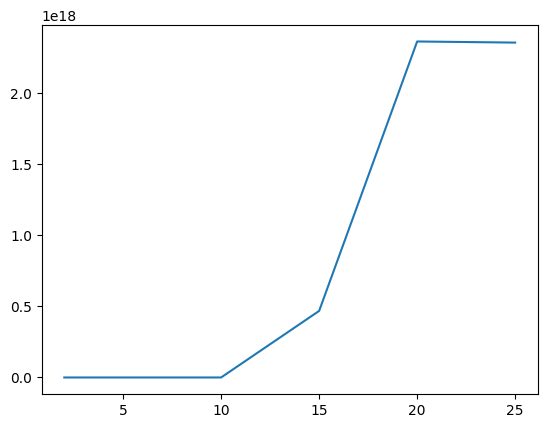

{2: 19.333333333333336,
 3: 526.1588210797212,
 5: 480849.1169979506,
 10: 16333640022240.15,
 15: 4.6845908193094074e+17,
 20: 2.3649314699982464e+18,
 25: 2.357052571410556e+18}

In [59]:
results_2a = {}
for n in [2, 3, 5, 10, 15, 20, 25]:
    H = np.array([[1/(i+j -1) for j in range(1, n+1)] for i in range(1, n+1)])
    results_2a[n] = np.linalg.norm(H) * np.linalg.norm(np.linalg.inv(H))
plt.plot(results_2a.keys(), results_2a.values())
plt.show()
results_2a

### Inciso b)

In [60]:
f = lambda x: np.sum([np.sin((k+1)*np.pi*x) for k in range(17)], axis=0)

def compare_aprroximation(f, f_approx, num_vals=1000):
    x_vals = np.linspace(0, 1, 1000)
    approximation = f_approx(x_vals)
    f_vals = f(x_vals)

    rmse = np.sqrt(((f_vals - approximation) ** 2).mean())
    mae = np.abs(f_vals - approximation).mean()

    plt.figure(figsize=(9, 5))
    plt.plot(x_vals, f(x_vals), label='f(x)')
    plt.plot(x_vals, approximation, label='Approximacion')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Aproximación de f(x)')
    plt.show()

    return rmse, mae

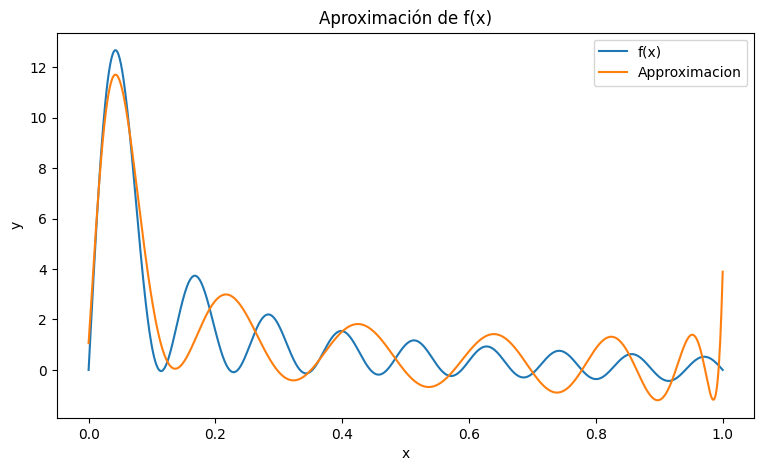

RMSE: 1.1947709710223275
MAE: 0.9677338698910204


In [61]:
def approximate_function_lu(f, n):
    A = np.array([[1/(i+j -1) for j in range(1, n+1)] for i in range(1, n+1)])
    b = np.zeros(n)

    for i in range(n):
        b[i] = np.trapz(f(np.linspace(0, 1, 1000)) * np.linspace(0, 1, 1000)**i, dx=1/1000)

    # Realizar descomposición LU
    lu, piv = lu_factor(A)

    # Resolver el sistema de ecuaciones utilizando la descomposición LU
    c = lu_solve((lu, piv), b)
    
    def f_approx(x):
        return sum([c[i] * (x**i) for i in range(n)])
    
    return f_approx

f_approx = approximate_function_lu(f, 20)
rmse, mae = compare_aprroximation(f, f_approx)

print("RMSE:", rmse)
print("MAE:", mae)

### Inciso c)

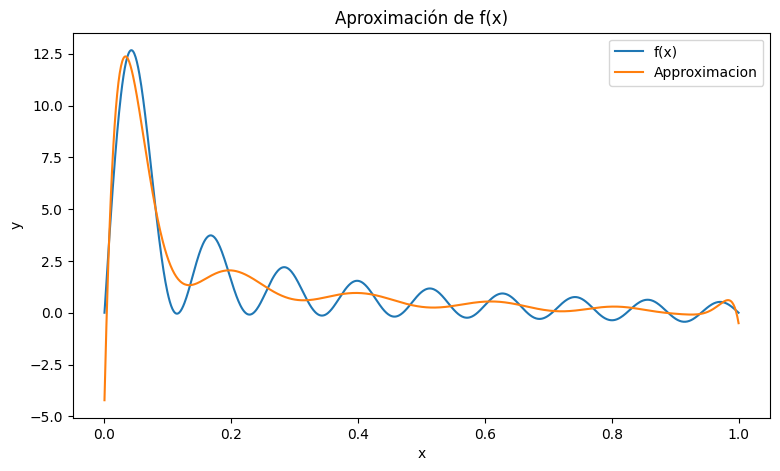

RMSE: 0.8321904173145913
MAE: 0.6350730374979832


In [62]:
def approximate_function_qr(f, n):
    A = np.array([[1/(i+j -1) for j in range(1, n+1)] for i in range(1, n+1)])
    b = np.zeros(n)

    for i in range(n):
        b[i] = np.trapz(f(np.linspace(0, 1, 1000)) * np.linspace(0, 1, 1000)**i, dx=1/1000)

    Q, R = qr(A)

    c = np.linalg.solve(R, np.dot(Q.T, b))
    
    def f_approx(x):
        return sum([c[i] * (x**i) for i in range(n)])
    
    return f_approx

f_approx = approximate_function_qr(f, 20)
rmse, mae = compare_aprroximation(f, f_approx)

print("RMSE:", rmse)
print("MAE:", mae)

Para este caso con n=20, es mejor la apoximacion con QR.